# <strong>Fixed Income Securities<strong> 


# A) Compute the accrued interest.

In [236]:
import numpy as np
import pandas as pd
import QuantLib as ql
import matplotlib.pyplot as plt

In [300]:
notional = 1000
couponRate = 0.0375
couponFrequency = 2

issueDate = ql.Date(31,7,2015)
firstCoupon = ql.Date(15,1,2016)
maturity =  ql.Date(15,7,2025)
settlementDate = ql.Date(25,10,2015)

inflationIssue =  237.14365 
inflationSettlement =  237.46721

In [301]:
u = ql.ActualActual().dayCount(issueDate, settlementDate)
w = ql.ActualActual().dayCount(issueDate, firstCoupon) 
M = maturity + 1  - issueDate #Number of of days
print(u,'|' ,w, '|', M)

86 | 168 | 3638


In [285]:
accruedInterest = (notional * (couponRate/couponFrequency) * (u/w)) 
print(accruedInterest)

inflVariance = (inflationSettlement / inflationIssue) - 1 

newNotional = notional * (1 + inflVariance)

accruedInteresInflated = (newNotional * (couponRate/couponFrequency) * (u/w)) 

print(accruedInteresInflated)

9.598214285714285
9.611310138014296


# b)
### Simulate 1000 scenarios for the inflation rate curve and CPI index

In [306]:
# Stochatis Process : Geometric Brownian Motion
# Stochatis Process : Euler Discretization

import numpy.random as npr
npr.seed(1) # Doesn´t matter the number you insert in the seed since you do not change it

miu = 0.03513
sigma = 0.022439
paths = 1000
dt = 1./ M
S = np.zeros((M + 1, paths))

S[0,:] = 237.14355
S[1:,:] = S[0,:] * np.exp((miu - 0.5 * sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * np.cumsum(npr.randn(M,paths), 0))
   
dates=[]
for idx in range(M + 1):
    dates.append(issueDate + idx)
EulerDisc_CPI = pd.DataFrame({'Date': dates})

for idx in range(paths):
     EulerDisc_CPI.loc[:,'Simulation '+str(idx)] = S[:,idx]
EulerDisc_CPI

,Date,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,"July 31st, 2015",237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,...,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550
1,"August 1st, 2015",237.289182,237.091866,237.099239,237.051189,237.222194,236.942867,237.299816,237.078684,237.173980,...,237.159998,237.135232,237.179854,237.209211,237.259773,237.135559,236.945004,237.139689,237.177054,237.129338
2,"August 2nd, 2015",237.275655,236.877406,237.144051,237.022615,237.088875,236.866065,237.223480,237.132382,237.223542,...,237.121994,237.218552,237.138132,237.085073,237.220280,237.152196,236.994454,237.058393,237.234182,237.251713
3,"August 3rd, 2015",237.318869,236.898451,237.104520,236.968762,236.909895,236.919643,237.192231,237.145843,237.267785,...,237.182414,237.322486,237.152697,237.105635,237.061239,237.084105,236.939562,237.045106,237.110653,237.136904
4,"August 4th, 2015",237.312062,236.916767,237.191527,237.095105,236.956459,236.887234,237.253277,237.075420,237.286659,...,237.016655,237.373299,237.161702,237.210124,236.991150,237.073000,236.854925,236.970696,237.166086,237.184302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,"July 12th, 2025",237.760965,232.366062,239.345010,235.775451,241.377504,237.234063,231.765196,239.965656,241.253812,...,225.150361,239.023524,228.474154,246.754163,240.502400,222.700228,235.733719,235.507255,233.283487,235.968884
3635,"July 13th, 2025",237.781839,232.358036,239.381012,235.801293,241.425053,237.205766,231.848295,239.916145,241.251193,...,225.141693,239.034689,228.615778,246.557922,240.569097,222.685212,235.748718,235.459548,233.385556,235.957878
3636,"July 14th, 2025",237.920048,232.375174,239.356812,235.767012,241.600939,237.114240,231.832491,240.022040,241.263154,...,225.093848,238.908352,228.550834,246.644212,240.458113,222.671047,235.853474,235.371223,233.357548,235.878503
3637,"July 15th, 2025",237.854639,232.509321,239.199342,235.843551,241.653488,237.148919,231.713538,239.860368,241.237524,...,225.176005,238.999637,228.545617,246.720638,240.445155,222.597602,235.731014,235.414296,233.283794,235.837223


Text(0.5, 0, 'Time (days)')

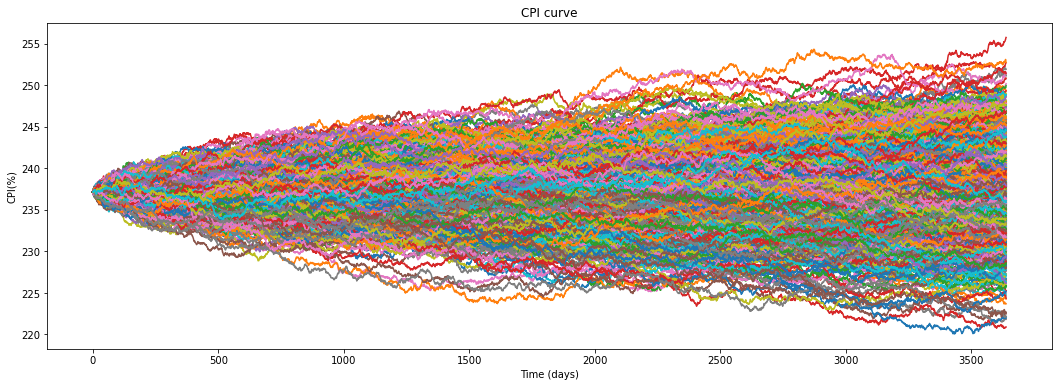

In [307]:
ax = EulerDisc_CPI.plot(title='CPI curve', figsize = (18,6), legend = None);
plt.ylabel('CPI(%)');
plt.xlabel('Time (days)')

In [303]:
inflationMatrix = pd.DataFrame({'Date': dates})
# inflationMatrix = pd.DataFrame(index= dates)
inflationMatrix = pd.DataFrame()

In [308]:
# Get inflation matrix
inflationMatrix = pd.DataFrame()

for idx in range(M):
    inflationMatrix.loc[idx, 'Date'] = EulerDisc_CPI.loc[idx, 'Date'] 
    for n in range(sim):
        inflationMatrix.loc[idx, 'Simulation ' + str(n)] = np.log((EulerDisc_CPI.loc[idx+1, 'Simulation ' + str(n)]/EulerDisc_CPI.loc[idx, 'Simulation ' + str(n)]))* 100
#print('Inflation Simulation completed')

Text(0.5, 0, 'Days after Issue Date')

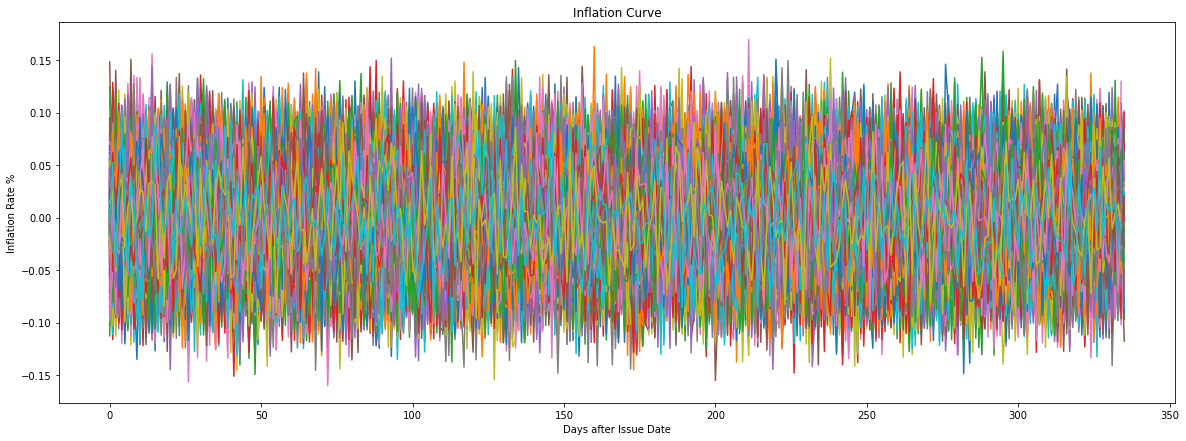

In [309]:
ax = sim_inflation.plot(title ='Inflation Curve', figsize = (20,7), legend = None);
plt.ylabel('Inflation Rate %')
plt.xlabel('Days after Issue Date')

Text(138.25, 0.5, 'CPI %')

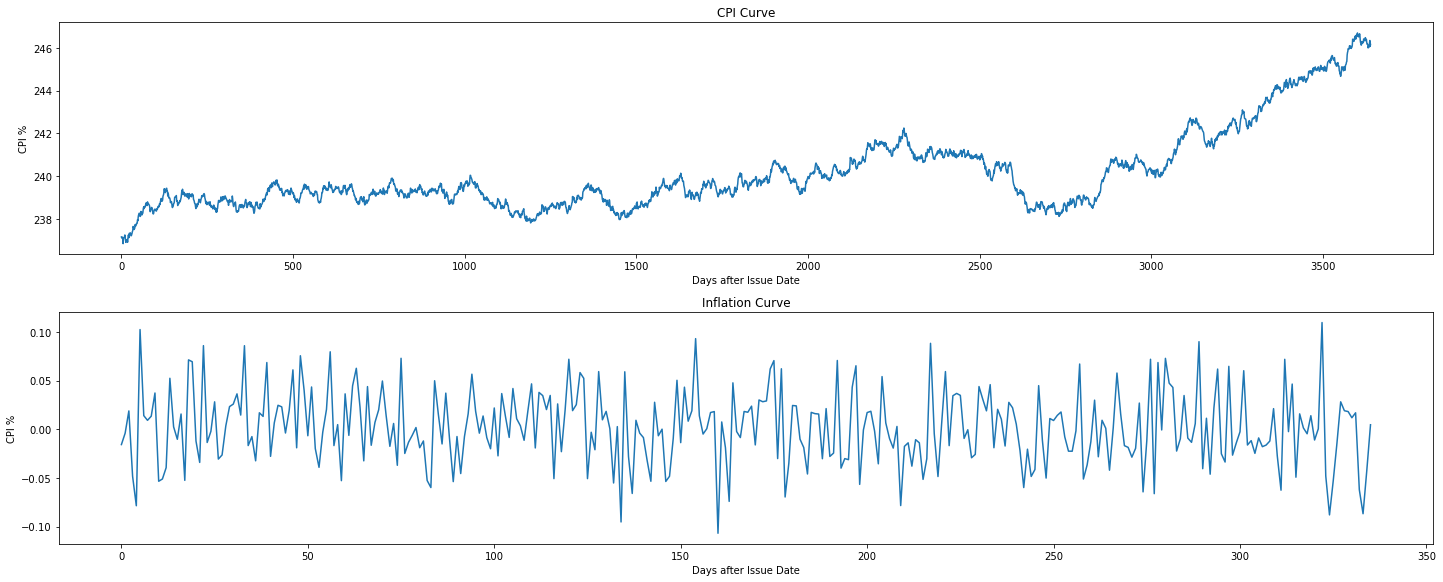

In [310]:
plt.rc('figure', figsize = (20,8))
fig, ax = plt.subplots(2,1)

ax[0].plot(EulerDisc_CPI.loc[:,'Simulation 100'])
ax[0].set_title('CPI Curve')
ax[0].set_xlabel('Days after Issue Date')
ax[0].set_ylabel('CPI %')

ax[1].plot(sim_inflation.loc[:,'Simulation 100'])
ax[1].set_title('Inflation Curve')
plt.tight_layout()
ax[1].set_xlabel('Days after Issue Date')
ax[1].set_ylabel('CPI %')

# C)
### For each scenario, compute the inflation linked bond cash flows and estimate the fair value.

In [311]:
# CPI simulations for each day

dates = [issueDate]
for idx in range(M):
    dates.append(issueDate + idx)
    
sim_cpi_dates = pd.DataFrame({'Date' : dates}).set_index('Date')
for idx in range(paths):
     sim_cpi_dates.loc[:,'Simulation '+str(idx)] = S[:, idx]
sim_cpi_dates

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
Date,,,,,,,,,,,,,,,,,,,,,
"July 31st, 2015",237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,...,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550,237.143550
"July 31st, 2015",237.289182,237.091866,237.099239,237.051189,237.222194,236.942867,237.299816,237.078684,237.173980,237.123832,...,237.159998,237.135232,237.179854,237.209211,237.259773,237.135559,236.945004,237.139689,237.177054,237.129338
"August 1st, 2015",237.275655,236.877406,237.144051,237.022615,237.088875,236.866065,237.223480,237.132382,237.223542,237.257495,...,237.121994,237.218552,237.138132,237.085073,237.220280,237.152196,236.994454,237.058393,237.234182,237.251713
"August 2nd, 2015",237.318869,236.898451,237.104520,236.968762,236.909895,236.919643,237.192231,237.145843,237.267785,237.188093,...,237.182414,237.322486,237.152697,237.105635,237.061239,237.084105,236.939562,237.045106,237.110653,237.136904
"August 3rd, 2015",237.312062,236.916767,237.191527,237.095105,236.956459,236.887234,237.253277,237.075420,237.286659,237.346093,...,237.016655,237.373299,237.161702,237.210124,236.991150,237.073000,236.854925,236.970696,237.166086,237.184302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"July 11th, 2025",237.760965,232.366062,239.345010,235.775451,241.377504,237.234063,231.765196,239.965656,241.253812,240.294933,...,225.150361,239.023524,228.474154,246.754163,240.502400,222.700228,235.733719,235.507255,233.283487,235.968884
"July 12th, 2025",237.781839,232.358036,239.381012,235.801293,241.425053,237.205766,231.848295,239.916145,241.251193,240.391034,...,225.141693,239.034689,228.615778,246.557922,240.569097,222.685212,235.748718,235.459548,233.385556,235.957878
"July 13th, 2025",237.920048,232.375174,239.356812,235.767012,241.600939,237.114240,231.832491,240.022040,241.263154,240.381346,...,225.093848,238.908352,228.550834,246.644212,240.458113,222.671047,235.853474,235.371223,233.357548,235.878503


Text(0, 0.5, 'Annual CPI %')

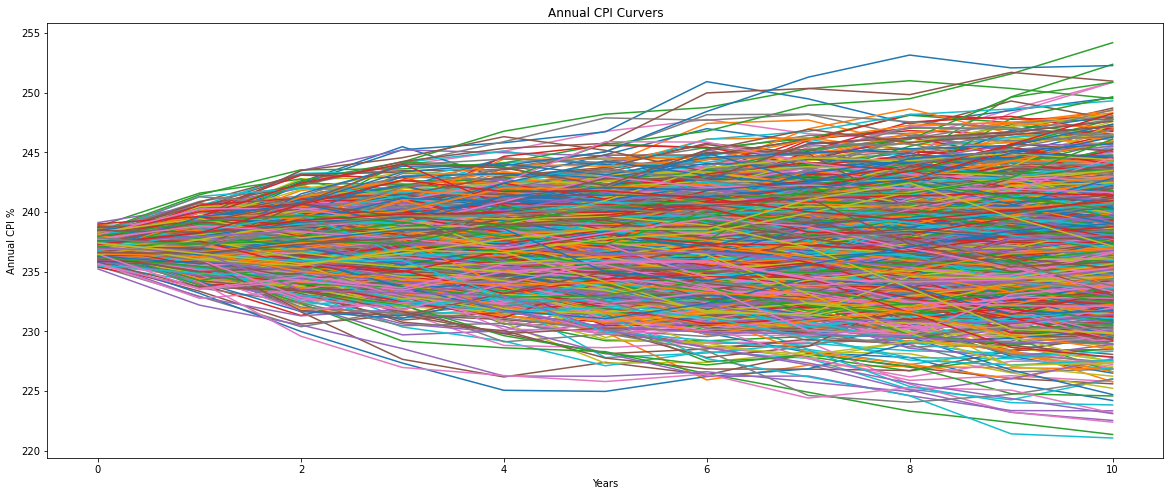

In [312]:
#mean of CPI annually and it for each simulation
dates = pd.date_range('2015','2026', freq = 'Y')
year = 2015
years = []
cpiMean = np.zeros((len(dates), paths))

# I will evaluate the evolution of the inflation annualy
for idx in range(len(dates)):
    cpiMean[idx,:] = sim_cpi_dates.loc[ql.Date(1,1,year):ql.Date(31,12,year)].mean()
    years.append(year)
    year += 1

cpi_annual = pd.DataFrame({'Year': years})

for idx in range(paths):
    cpi_annual.loc[:,'Simulation '+ str(idx)] = cpiMean[:, idx]
    
cpi_annual.set_index('Year')
ax = cpi_annual.loc[:,'Simulation 1':'Simulation 999'].plot(title='Annual CPI Curvers',figsize = (20,8),legend = None);
plt.xlabel('Years')
plt.ylabel('Annual CPI %')



In [313]:
# Get inflation matrix
inflationAnnualy = pd.DataFrame({'Year': years})

for idx in range(1, len(cpi_annual)):
    for n in range(paths):
        inflationAnnualy.loc[idx, 'Simulation ' + str(n)] = ((cpi_annual.loc[idx, 'Simulation ' + str(n)]-cpi_annual.loc[idx - 1, 'Simulation ' + str(n)])/ cpi_annual.loc[idx - 1, 'Simulation ' + str(n)])* 100
inflationAnnualy.set_index('Year')

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
Year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-0.018029,0.410347,0.768454,0.227130,-0.427790,-0.668905,1.223251,0.431901,0.941612,0.546088,...,-0.431931,-0.410333,-0.301678,-0.089849,0.402700,-0.138323,-0.008930,-0.875847,-0.325837,-0.377282
2017,0.602019,0.577645,0.812222,0.222121,-0.494795,0.166513,-0.803089,0.218870,-0.010933,1.423701,...,-0.235771,0.531935,-0.668072,0.089446,1.000307,-1.349489,0.303942,0.436708,0.731015,-0.353952
2018,0.442118,0.210868,-0.096353,-1.204300,0.225981,0.669182,-0.409754,0.295899,-0.571876,0.051477,...,0.012954,0.345395,-0.300342,-0.090775,0.844838,-0.108414,0.234347,-0.406741,0.377023,0.357983
2019,-0.106488,-0.899360,0.051431,-0.247067,0.377369,-0.504213,-1.347797,0.195281,-0.367022,-0.905519,...,-1.288219,0.041571,-0.200183,0.762484,-0.394169,-0.103272,0.461009,0.857984,-0.016998,0.511070
2020,-0.056025,0.322087,0.406108,-0.368771,0.433717,-1.071223,0.282791,0.319490,0.734525,-0.130866,...,-1.264278,-1.504162,0.121524,0.504753,0.024539,-1.221428,0.253381,0.047852,0.262082,0.355506
2021,0.324063,-0.228975,0.229822,0.254239,0.648059,0.106057,-0.063120,0.364148,-0.882705,0.267239,...,-0.307047,-0.319468,-0.370617,0.287075,-0.253244,-0.641347,0.413526,0.029482,-0.194752,-0.010462
2022,0.888282,-0.339871,-0.590877,-0.009638,0.226018,0.741040,-0.353620,0.227890,0.115084,0.556203,...,-0.352660,0.576734,-0.243220,0.205195,-0.471143,-0.565221,0.267812,-0.598690,-0.805854,1.047555
2023,-0.454401,-1.003217,-0.489700,-0.260799,0.287733,-1.064643,-0.649835,0.587031,0.452063,-0.300218,...,-1.335235,0.627205,-0.479776,-0.001087,-0.302099,-0.742592,-1.596870,-0.110586,0.154301,0.575853


Text(0.5, 0, 'Years')

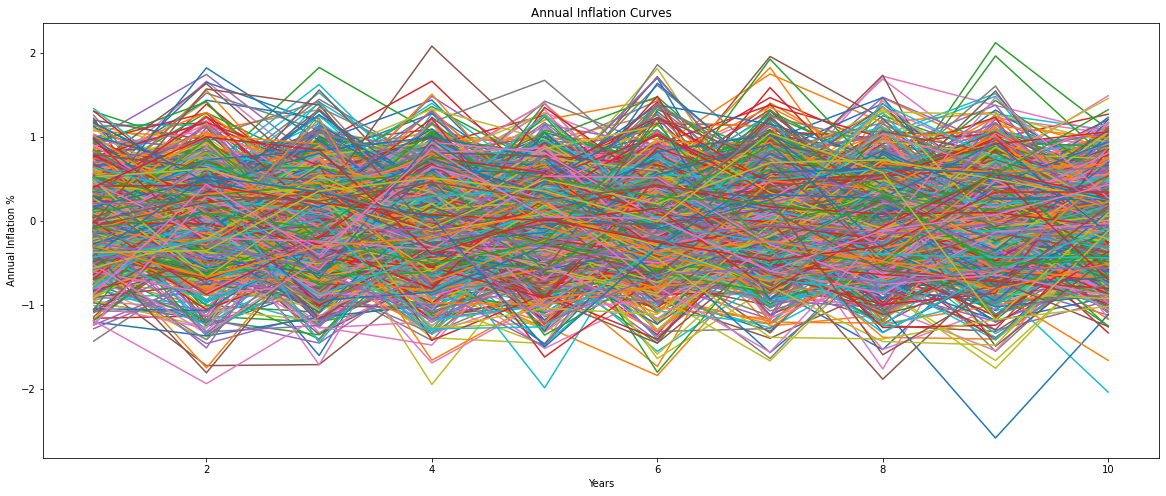

In [314]:
# inflation Annual Curves

ax = inflationAnnualy.loc[:,'Simulation 1':'Simulation 999'].plot(title = 'Annual Inflation Curves', figsize=(20,8), legend=None);
plt.ylabel('Annual Inflation %')
plt.xlabel('Years')

In [318]:
def CashFlowILB(cp_rate, year, mat, freq, notional, inflation):
    inflation /= 100
    cp_rate /= 100
    coupon = coupon_rate * notional * (1+inflation) / frequency
    if year < mat:
        return coupon
    if year == mat:
        return coupon
    elif year > mat:
        return 0
    
def get_years_to_maturity(ini_date, end_date):
    return abs((end_date - ini_date)/360)

def nss(p,term):
    beta0, beta1, beta2, beta3, tau1, tau2 = p 
    return ( beta0
            + beta1 * (1 - np.exp(-term/tau1)) / (term/tau1)
            + beta2 * ((1 - np.exp(-term/tau1)) / (term/tau1) - np.exp(-term/tau1))
            + beta3 * ((1 - np.exp(-term/tau2)) / (term/tau2) - np.exp(-term/tau2))
               ) *100
    
def PriceILB(maturity, coupon_rate, par, yld, frquency, inflation):
    inflation /= 100
    coupon_rate /= 100
    coupon = coupon_rate * par * (1+inflation) / frequency
    cfs = [(coupon if n < maturity else coupon + 1)/(1+ (yld / frequency))**n for n in range(1, maturity+1)]
    return sum(cfs)




In [324]:
# Considering Bonds of maturities xx

n_nss = np.array(range(1,10))

beta0= 0.059
beta1= -0.016
beta2= 0.005
beta3= 0.01
tau1= 5
tau2=0.5
p= [beta0, beta1, beta2, beta3, tau1, tau2]

coupon_rate = 3.75
maturity = 10
frequency = 2
face_value = 1000
years_coupons = years[1:11]
coupon_dates = []

for n in range(len(years_coupons)-1):
    first_coupon_year = ql.Date(15, 1, years_coupons[n])
    coupon_dates.append(first_coupon_year)
    second_coupon_year = ql.Date(15, 7, years_coupons[n])
    coupon_dates.append(second_coupon_year)

# Add Last coupon date
lastcoupon_date = ql.Date(15,1,years_coupons[-1])
coupon_dates.append(lastcoupon_date)
cashflows=pd.DataFrame({'Date': coupon_dates})
inf = 1

for idx in range(0,len(coupon_dates)-1):
    curr_year = coupon_dates[idx].year()
    for n in range(paths):
        if curr_year == inflationAnnualy.loc[inf,'Year']:
            inflation_year = inflationAnnualy.loc[inf,'Simulation '+str(n)]
            inflation_year_ant = inflation_year
        else:
            inflation_year = inflation_year_ant
            inf +=1
        cashflows.loc[idx, 'Simulation '+ str(n)] = cashflowILB(coupon_rate, inf, maturity, frequency, face_value, inflation_year)
cashflows.loc[len(cashflows)-1]  = 1000
cashflows

,Date,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,"January 15th, 2016",1874.661962,1882.694013,1889.408521,1879.258687,1866.978944,1862.458027,1897.935964,1883.098137,1892.655228,...,1866.901287,1867.306265,1869.343546,1873.315330,1882.550622,1872.406436,1874.832556,1858.577862,1868.890554,1867.925964
1,"July 15th, 2016",1874.661962,1882.694013,1889.408521,1879.258687,1866.978944,1862.458027,1897.935964,1883.098137,1892.655228,...,1866.901287,1867.306265,1869.343546,1873.315330,1882.550622,1872.406436,1874.832556,1858.577862,1868.890554,1867.925964
2,"January 15th, 2017",1867.925964,1885.830851,1890.229154,1879.164765,1865.722598,1878.122113,1859.942077,1879.103820,1874.795004,...,1870.579301,1884.973786,1862.473656,1876.677108,1893.755758,1849.697075,1880.698920,1883.188278,1888.706536,1868.363407
3,"July 15th, 2017",1886.287849,1885.830851,1890.229154,1879.164765,1865.722598,1878.122113,1859.942077,1879.103820,1874.795004,...,1870.579301,1884.973786,1862.473656,1876.677108,1893.755758,1849.697075,1880.698920,1883.188278,1888.706536,1868.363407
4,"January 15th, 2018",1868.363407,1878.953773,1873.193383,1852.419381,1879.237147,1887.547161,1867.317104,1880.548107,1864.277329,...,1875.242885,1881.476148,1869.368586,1873.297968,1890.840722,1872.967244,1879.394014,1867.373608,1882.069181,1881.712173
5,"July 15th, 2018",1883.289714,1878.953773,1873.193383,1852.419381,1879.237147,1887.547161,1867.317104,1880.548107,1864.277329,...,1875.242885,1881.476148,1869.368586,1873.297968,1890.840722,1872.967244,1879.394014,1867.373608,1882.069181,1881.712173
6,"January 15th, 2019",1881.712173,1858.137005,1875.964339,1870.367493,1882.075660,1865.545999,1849.728797,1878.661515,1868.118339,...,1850.845895,1875.779449,1871.246573,1889.296576,1867.609332,1873.063652,1883.643919,1891.087202,1874.681295,1884.582564
7,"July 15th, 2019",1873.003355,1858.137005,1875.964339,1870.367493,1882.075660,1865.545999,1849.728797,1878.661515,1868.118339,...,1850.845895,1875.779449,1871.246573,1889.296576,1867.609332,1873.063652,1883.643919,1891.087202,1874.681295,1884.582564
8,"January 15th, 2020",1884.582564,1881.039128,1882.614527,1868.085541,1883.132195,1854.914573,1880.302327,1880.990438,1888.772346,...,1851.294780,1846.796960,1877.278566,1884.464118,1875.460113,1852.098219,1879.750901,1875.897224,1879.914046,1881.665733
9,"July 15th, 2020",1873.949540,1881.039128,1882.614527,1868.085541,1883.132195,1854.914573,1880.302327,1880.990438,1888.772346,...,1851.294780,1846.796960,1877.278566,1884.464118,1875.460113,1852.098219,1879.750901,1875.897224,1879.914046,1881.665733


In [325]:
# Calculate the fair value
simulation = range(paths)
bond_info = pd.DataFrame({'Simulation': simulation}).set_index('Simulation')
for idx in range(paths):
    bond_info.loc[idx,'Fair Value'] = cashflows.loc[:,'Simulation '+str(idx)].sum() - accruedInterest
    bond_info.loc[idx,'Inflation'] = inflationAnnualy.loc[:,'Simulation '+str(idx)].median()
bond_info
    

,Fair Value,Inflation
Simulation,,
0,34793.725209,-0.037027
1,34709.495114,-0.051339
2,34751.556403,0.140627
3,34727.140489,0.013502
4,34776.552311,0.256875
...,...,...
995,34536.395043,-0.567657
996,34722.388001,0.243864
997,34719.949504,0.038667


# d)
### Summarise and analyse the inflation linked bond price distribution, including risk measures